In [ ]:
# !pip install pandas
# !pip install nltk
# !pip install scikit-learn

## **Spam or Ham Classifier Project**

### **Importing the Dataset**

In [ ]:
import pandas as pd

messages = pd.read_csv(
    '../NLP-for-Transformers/Datum/SMSSpamCollection',
    sep='\t',
    names=['label', 'message']
)

messages

In [ ]:
print(messages['message'],'\n')

print(messages['message'].loc[100],'\n')
print(messages['message'].loc[451])

'''
1. messages refers to the pandas DataFrame that contains the dataset.

2. ['message'] selects the "message" column from the DataFrame,
   which contains the SMS/text content.

3. .loc[451] selects the row with index label 451.

4. This returns the text message present at index 451 in the dataset.

5. It is commonly used to inspect or view a specific sample message
   from the corpus for understanding or debugging.
''';

### **Step-1: Text Preprocessing** 
    1. Tokenization, 
    2. StopWords, 
    3. Stemmming, 
    4. Lemmatization, 
    5. NLTK

In [ ]:
# Data cleaning and preprocessing

import re
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # See the Capital letters

ps = PorterStemmer()

In [ ]:
stop_words = set(stopwords.words('english')) # List to Set
'''
The final corpus contains all messages after:
    - Cleaning
    - Lowercasing
    - Stopword removal
    - Stemming
'''

corpus = [] # Group of Sentences
for i in range(len(messages)): # for each sentence in that message
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower().split()

    cleaned_words = [] # Group of Individual Words
    for word in review: # for each word in that sentence
        if word not in stop_words:
            s_word = ps.stem(word)
            cleaned_words.append(s_word) # Adds the Stemmed word to the Sentence List

    Sentence = ' '.join(cleaned_words) # Forming the sentance from Cleaned Words
    corpus.append(Sentence) # Adds the cleaned sentence to the corpus List 

corpus

'''
1. corpus = [] initializes an empty list to store the cleaned and processed text data.

2. stop_words stores the set of English stopwords from NLTK,
   which will be removed from the text during preprocessing.

3. The for loop iterates over each message in the dataset.

4. re.sub('[^a-zA-Z]', ' ', messages['message'][i])
   - Replaces all non-alphabetic characters with spaces.
   - Removes numbers, punctuation, and special symbols.

5. review.lower().split()
   - Converts text to lowercase.
   - Splits the sentence into individual words (tokens).

6. review1 = [] initializes a list to store processed words for the current message.

7. For each word in review:
   - If the word is not in stop_words,
   - Apply Porter stemming using ps.stem(word),
   - Append the stemmed word to review1.
''';

corpus

### **Step-2: Text --> Vectors** 
    1.BoW, 
    2. TF-IDF, 
    3. Word2Vec, 
    4. AvgWord2Vec

### **Creating the Bag of Words model**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus)

X = X.toarray()

'''
0. These below lines implement the Bag of Words (BoW) model on your text data.

1. CountVectorizer is a tool from scikit-learn that converts raw text into 
numerical feature vectors using the Bag of Words (BoW) model.

2. This creates a CountVectorizer object.
    What it does:
    Converts text → numeric vectors
    Builds a vocabulary from your corpus
    Represents each document by word counts

3. Keeps only the top 2500 most frequent words in the corpus.

4. x = cv.fit_transform(corpus)
This does two things:
    🔹 fit(corpus)
        Scans all documents in corpus
        Learns the vocabulary (up to 2500 words)
        Assigns each word an index (column)

    🔹 transform(corpus)
        Converts each document into a vector
        Each vector length = vocabulary size (≤ 2500)
        Values = word counts in that document
'''

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 2500))

In [ ]:
y = pd.get_dummies(messages['label']) # Dummies --> OHE.
y = y.iloc[:,1] # selecting the 2nd column of the spam,ham

'''
0. get_dummies is a pandas function used to convert categorical values into numeric (one-hot encoded) columns.

1. pd.get_dummies(messages['label']) converts the text labels (like "ham" and "spam")
   into separate binary columns (one-hot encoding).

2. Each label becomes a column with values 0 or 1.
   Example:
      "ham"  → [1, 0]
      "spam" → [0, 1]

3. y.iloc[:, 1] selects the second column from the dummy DataFrame,
   which usually corresponds to the "spam" class.

4. .values converts the selected column into a NumPy array.

5. The final target vector y becomes:
      spam → 1
      ham  → 0

6. This numeric y is used as the output/label variable
   for training the machine learning classification model.
'''

# y = y.astype(int)
y.values

In [33]:
# Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 2500)
(1115, 2500)
(4457,)
(1115,)


#### **Naive Bayes**

Why use Naive Bayes (MultinomialNB) for Spam Detection?

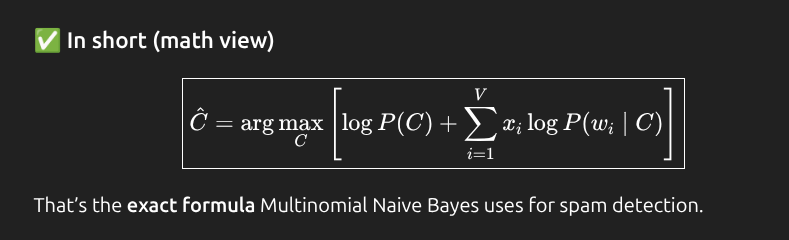

We use **Naive Bayes** here because spam detection is a **text classification** problem and our text is represented as **Bag of Words / TF-IDF word counts**.

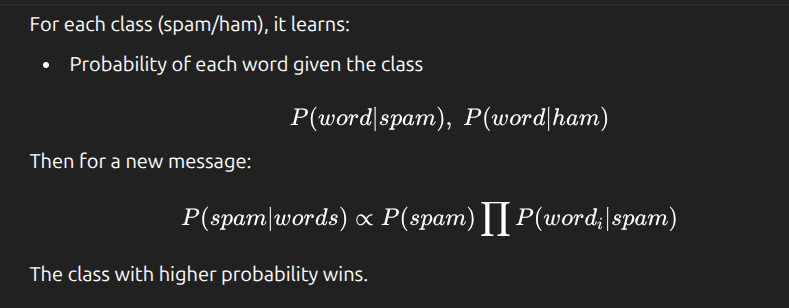

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

'''
1. from sklearn.naive_bayes import MultinomialNB
   - Imports the Multinomial Naive Bayes classifier from scikit-learn.
   - This algorithm is commonly used for text classification problems
     such as spam detection.

2. MultinomialNB()
   - Creates an instance of the Naive Bayes model.
   - It is designed to work with discrete features like
     word counts or TF-IDF values.

3. .fit(X_train, y_train)
   - Trains (fits) the model on the training data.
   - X_train contains the feature vectors for the messages.
   - y_train contains the corresponding labels
     (e.g., 0 = ham, 1 = spam).

4. spam_detect_model
   - Stores the trained classifier.
   - This model can now be used to make predictions on new data
     using spam_detect_model.predict().
''';

spam_detect_model